In [1]:

import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

# Turn on autoreload
%load_ext autoreload
%autoreload 2

DIRNAME = "./saved_models/"


## Inspect trajectories

Look at the static predictions made after training

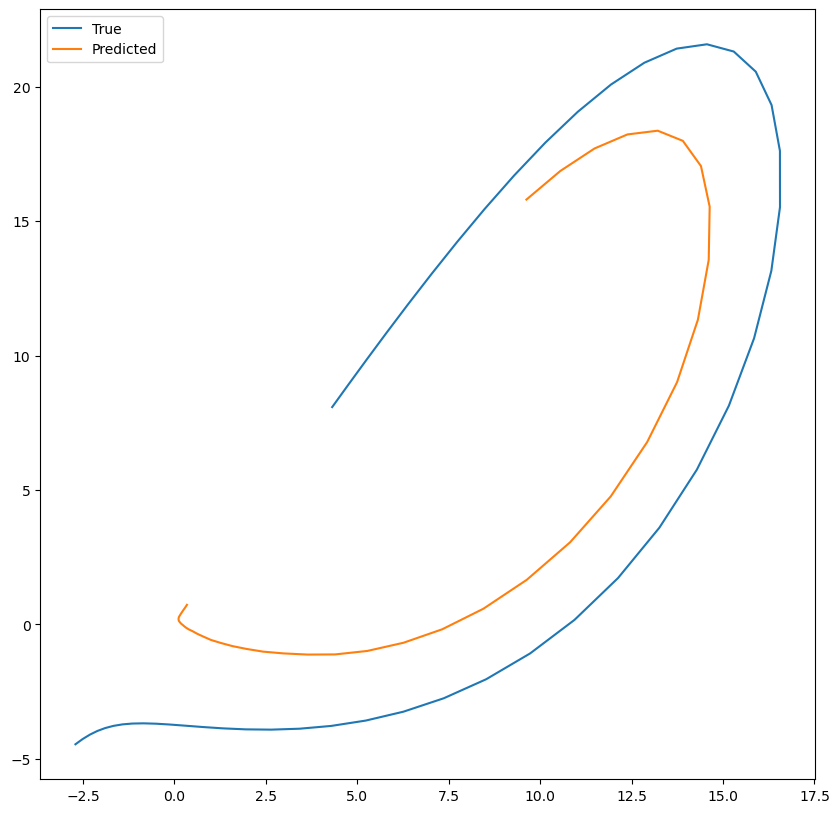

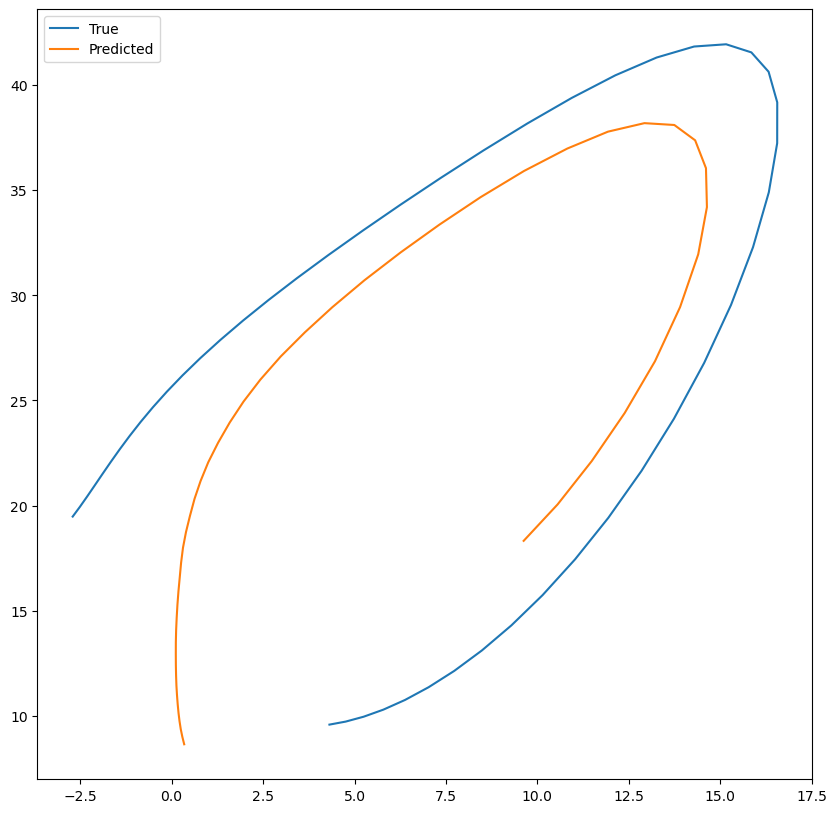

In [2]:

traj_true = np.load(os.path.join(DIRNAME, "traj_Lorenz_granularity100_true.npy"), allow_pickle=True)
traj_pred = np.load(os.path.join(DIRNAME, "forecast_Lorenz_Transformer_granularity100.npy"), allow_pickle=True)
traj_pred = np.load(os.path.join(DIRNAME, "forecast_Lorenz_NBEATS_granularity100.npy"), allow_pickle=True)


tlen = 50
plt.figure(figsize=(10, 10))
plt.plot(traj_true[:tlen, 0], traj_true[:tlen, 1], label="True")
plt.plot(traj_pred[:tlen, 0], traj_pred[:tlen, 1], label="Predicted")
plt.legend()


plt.figure(figsize=(10, 10))
plt.plot(traj_true[:tlen, 0], traj_true[:tlen, 2], label="True")
plt.plot(traj_pred[:tlen, 0], traj_pred[:tlen, 2], label="Predicted")
plt.legend()

## Load models

In [8]:
model_path = os.path.join(DIRNAME, "trained_Transformer_Lorenz_granularity100.pt")

from darts.models.forecasting.transformer_model import TransformerModel

# model = TransformerModel.load(model_path) # For GPU only
model = TransformerModel.load(model_path, map_location="cpu")
model.to_cpu()
model.predict(100) # predict using the last input_chunk_length points of the training data as the lookback
# model.predict(100, series=series) # use a passed time series as the lookback for predictions

/Users/william/micromamba/envs/dysts_benchmarks/lib/python3.12/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/william/micromamba/envs/dysts_benchmarks/lib/python3.12/site-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/william/micromamba/envs/dysts_benchmarks/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider i

Predicting: |          | 0/? [00:00<?, ?it/s]

: 

In [ ]:
model_path = os.path.join(DIRNAME, "trained_NBEATS_Lorenz_granularity100.pt")

from darts.models.forecasting.nbeats import NBEATSModel

## Crashes
model = NBEATSModel.load(model_path, map_location="cpu")


In [8]:
from dysts.flows import Lorenz

eq = Lorenz()
traj = eq.make_trajectory(2000, atol=1e-12, rtol=1e-12, timescale="Lyapunov")

/Users/william/micromamba/envs/dysts_benchmarks/lib/python3.12/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `timescale`.
  warn("The following arguments have no effect for a chosen solver: {}."


In [3]:
model_path = os.path.join(DIRNAME, "trained_NBEATS_Lorenz_granularity100.pt")

from darts.models.forecasting.nbeats import NBEATSModel

# model = NBEATSModel.load(model_path, map_location="cpu")
# model.to_cpu()
## Crashes for some reason


model = NBEATSModel(input_chunk_length=25, output_chunk_length=1)
model.load_weights(model_path)

: 

In [ ]:
model_path = os.path.join(DIRNAME, "trained_NBEATS_Lorenz_granularity100.pt")

from darts.models.forecasting.nbeats import NBEATSModel

# model = NBEATSModel.load(model_path, map_location="cpu")
# model.to_cpu()
## Crashes for some reason


model = NBEATSModel(input_chunk_length=25, output_chunk_length=1)
model.load_weights(model_path)

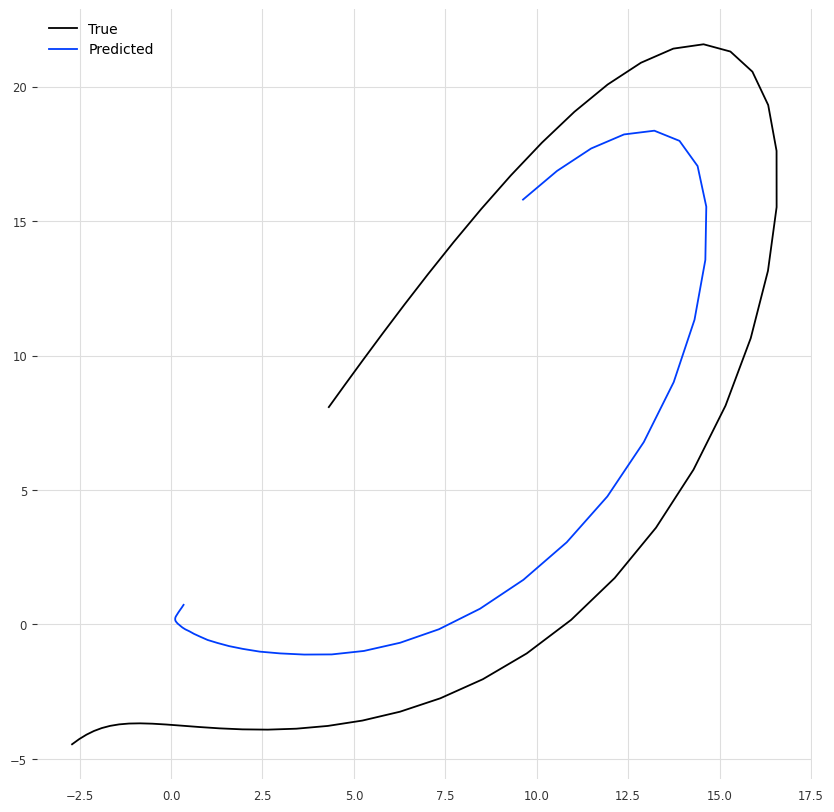

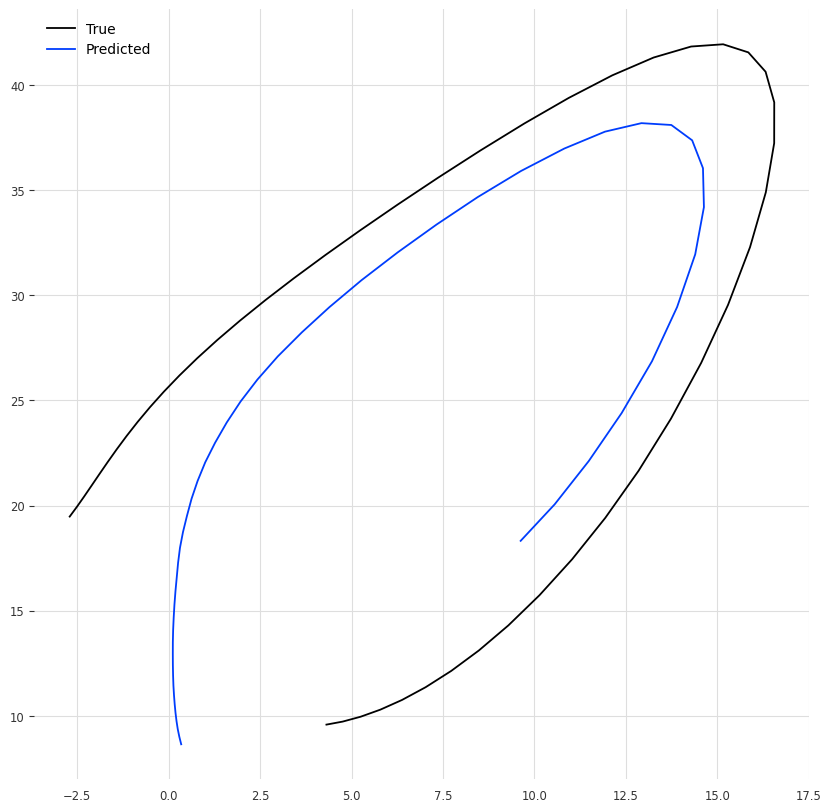